In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12, 6)})

In [25]:
import pytz

# dateparse_traffic = lambda x: pd.datetime.strptime(x,             "%Y-%m-%d %H:%M:%S+%f")
dateparse = lambda x: pd.datetime.strptime(x[:-3] + "00", "%Y-%m-%d %H:%M:%S%z").astimezone(pytz.utc)

loans = pd.read_csv("../../data/kiva/kiva_loans.csv") # ,
#                     parse_dates = ['posted_time', 'disbursed_time', "funded_time"],
#                     date_parser = dateparse)

loans.head(3)

In [32]:
for i in range(len(loans)):
    try:
        dateparse(loans.disbursed_time.iloc[i])
    except:
        print(i)

2221
2514
3065
3072
3847
4145
4814
6784
7208
7289
10735
11131
12037
13542
14494
15253
16514
16747
23206
25554
26586
28018
31315
34834
35087
36552
36611
36788
37993
42463
43411
43717
43962
44889
45418
46982
47320
48809
49819
49929
55064
56371
56431
57631
58747
65599
66159
66434
67540
67619
67643
67848
67936
68148
68400
68590
68848
68870
69876
69930
70072
70281
72814
72916
73707
73831
73888
74347
74351
74563
74811
75090
75700
76434
77120
77592
77826
77879
78099
78563
79206
79232
80049
80108
80141
81007
81411
81827
82576
83140
84280
85171
85186
85582
85684
86950
87235
88208
89028
89125
89268
90463
90595
90861
93069
93826
94177
94235
94382
94385
94608
94843
94986
95351
95468
95647
97409
98243
98371
99158
99228
99855
100310
100512
101198
103145
103854
104295
104911
104952
105811
106106
107197
108487
108490
108519
108870
108927
109178
109320
109831
109894
110368
110450
111398
111428
112649
112669
112864
112871
112925
115273
115876
116603
116661
116693
118920
119772
119928
121116
121424
12154

389460
389682
390461
390637
390873
390900
391001
391266
391353
391507
391892
392023
392133
392383
392824
393128
393264
393375
393399
393444
393585
393675
394482
394589
394608
395256
395517
397671
397962
398603
398742
398927
399242
399661
401637
401913
402036
402105
402248
402524
402561
402827
402829
403481
403539
403563
403826
404015
404029
404295
404742
404757
405346
405392
405528
405622
405671
405712
405776
405800
405980
406348
406386
406509
406673
406768
407082
408077
408387
408604
408634
408725
409122
409360
410276
410320
411856
412036
413209
413331
413685
414131
414144
414447
414505
414529
414644
414719
414797
414854
415107
415401
416053
416567
416653
416699
416767
416771
416803
416826
416901
417037
417108
417151
417612
417696
417969
418330
419043
419205
419295
419319
419626
419631
419772
420007
420129
420200
420888
420932
421166
421331
421801
421818
422572
422660
422919
423232
423441
423739
423923
424105
424577
424813
426273
426308
426501
426974
427014
427132
427280
427362
427386

664448
664455
664466
664472
664589
664639
664712
664846
664870
664882
664945
665033
665110
665134
665159
665164
665190
665299
665362
665791
665896
666187
666548
666552
666606
666736
666798
667514
667925
667963
668076
668156
668201
668216
668290
668437
668563
668629
668891
669457
669557
669757
669905
670290
670323
670540
670728
670825
670833
670883
670914
670915


In [4]:
" - ".join(list(loans.columns))

'id - funded_amount - loan_amount - activity - sector - use - country_code - country - region - currency - partner_id - posted_time - disbursed_time - funded_time - term_in_months - lender_count - tags - borrower_genders - repayment_interval - date'

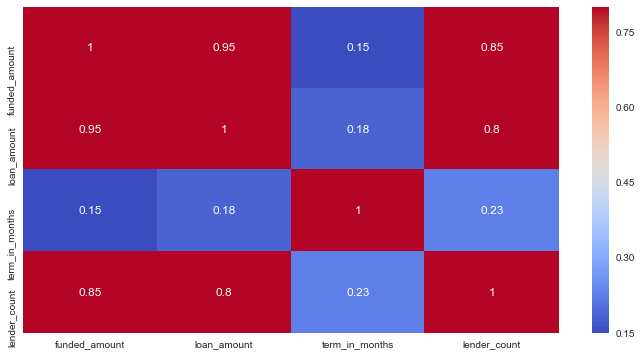

In [21]:
_ = sns.heatmap(loans.drop(["id", "partner_id"], axis=1).corr(), vmax=.8, cmap = "coolwarm", annot=True)

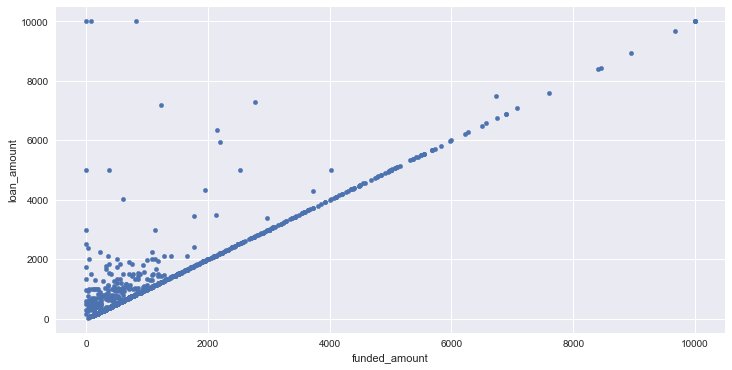

In [22]:
_ = loans.sample(3000).plot(kind="scatter", x="funded_amount", y="loan_amount")

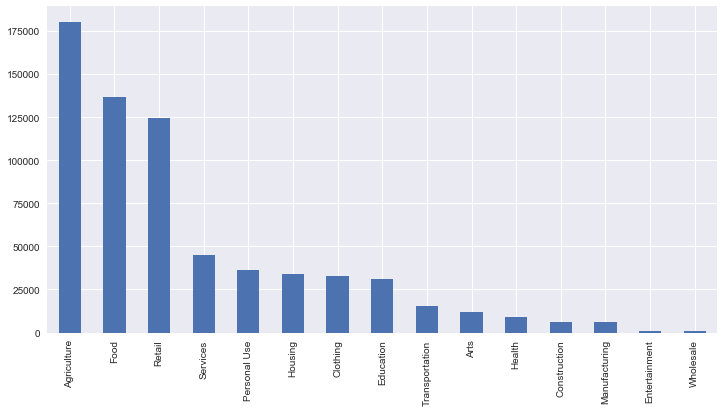

In [6]:
_ = loans.sector.value_counts().plot(kind="bar")

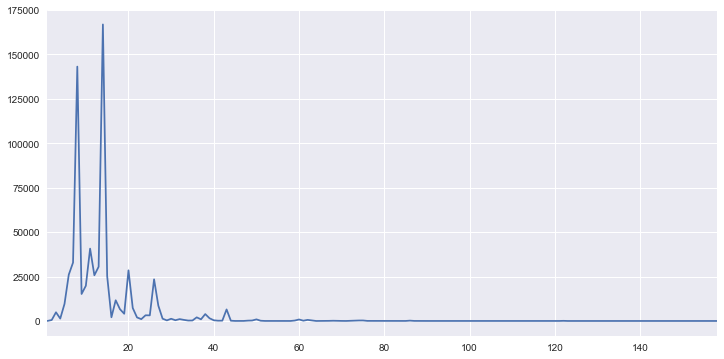

In [7]:
_ = loans.term_in_months.value_counts().sort_index().plot.line()

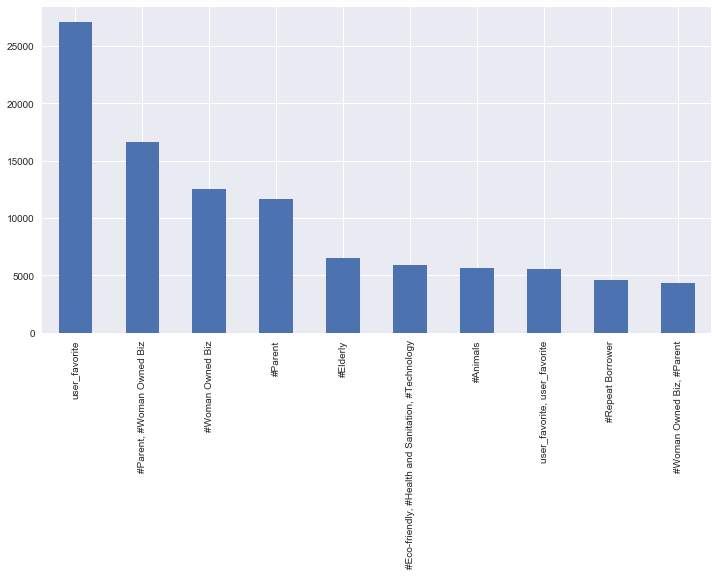

In [8]:
_ = loans.tags.value_counts().head(10).plot(kind="bar")

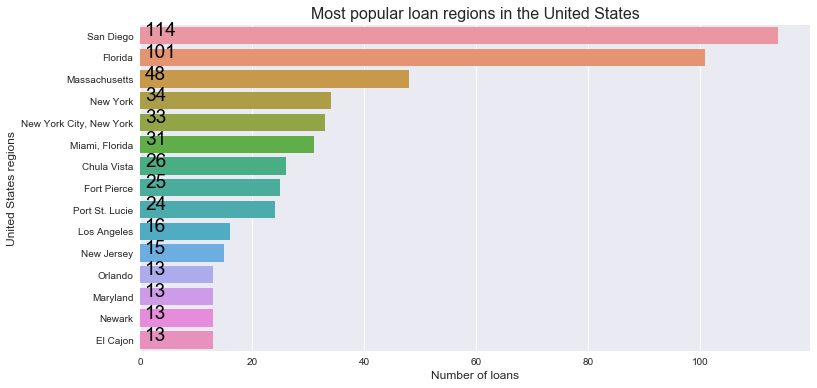

In [12]:
country = "United States"

usa = loans[loans.country == country]
usa_regions = usa.region.value_counts().head(15)
sns.barplot(usa_regions.values, usa_regions.index)

for i, v in enumerate(usa_regions.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
    
plt.xlabel('Number of loans', fontsize=12)
plt.ylabel('{} regions'.format(country), fontsize=12)
_ = plt.title("Most popular loan regions in the {}".format(country), fontsize=16)

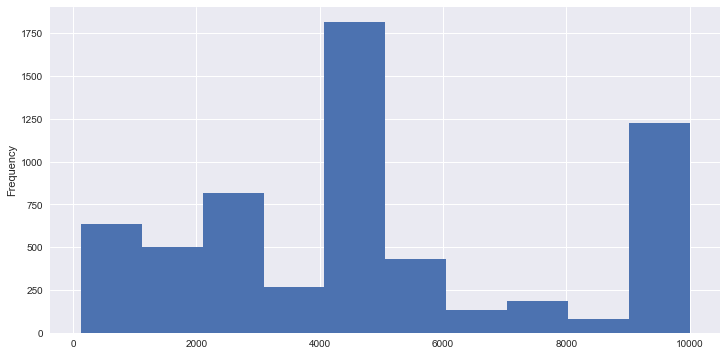

In [14]:
_ = usa.loan_amount.plot(kind="hist", x="Amount of money", y="Count")